In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

In [2]:
#the data comes in csv files, we need to read using pandas.

df_agk = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl advanced goalkeeping.csv')
df_gk = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goalkeeper.csv')
df_defense = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl defensive actions.csv')
df_passing = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl passing.csv')
df_passtype = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl pass types.csv')
df_possession = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl possession.csv')
df_goalsc = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl goal and shot creation.csv')
df_shooting = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl shooting.csv')
df_stdstats = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl standard stats.csv')
df_misc = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl miscellanous.csv')
df_playtime = pd.read_csv('/content/drive/My Drive/UCL 22_23/ucl player playing time.csv')

In [3]:
print(df_misc.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'Yellow Cards', 'Red Cards', '2nd Yellows', 'Fouls Comitted',
       'Fouls Drawn', 'Crosses', 'Interceptions', 'Tackles won',
       'penalties won', 'penalties comitted', 'own goals ', 'ball recoveries',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


In [4]:
# Defining function to renaming multiple columns by index

def rename_col_by_index(dataframe, index_mapping):
    dataframe.columns = [index_mapping.get(i, col) for i, col in enumerate(dataframe.columns)]
    return dataframe

# Renaming columns using the function
new_column_mapping = {12: 'Offsides', 13: 'Crosses', 14: 'Interceptions', 15: 'Tackles won', 16: 'penalties won', 17: 'penalties comitted', 18: 'own goals', 19:'ball recoveries', 20:'Aerial Duels won', 21: 'Aerial Duels lost', 22: 'Aerial Duels won%'}
df_misc = rename_col_by_index(df_misc, new_column_mapping)
print(df_misc.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'Yellow Cards', 'Red Cards', '2nd Yellows', 'Fouls Comitted',
       'Fouls Drawn', 'Offsides', 'Crosses', 'Interceptions', 'Tackles won',
       'penalties won', 'penalties comitted', 'own goals', 'ball recoveries',
       'Aerial Duels won', 'Aerial Duels lost', 'Aerial Duels won%'],
      dtype='object')


In [5]:
#Check All the columns in UCL Passing Data.
print(df_passing.columns)

#The Column name 'Club ' has space in it. We need to rename it to 'Club' in order
df_passing= df_passing.rename(columns={'Club ': 'Club'})

Index(['Player', 'Nationality', 'Position', 'Club ', 'Age', 'Born', '90s',
       'Total Passes completed', 'Total Passes attempted',
       'Total Passes completion %', 'Total passing distance',
       'Progressive passing distance', 'Passes attempted (short)',
       'Passes completed (short)', 'Passes completed (short) %',
       'Passes attempted (medium)', 'Passes completed (medium)',
       'Passes completed (medium) %', 'Passes attempted (long)',
       'Passes completed (long)', 'Passes completed (long) %', 'Assists',
       'Expected Assist Goals (xAG)', 'xA', 'A-xAG', 'Key Passes',
       'Passes into Final third', 'Passes into Penalty Area',
       'Crosses into Penalty Area', 'Progressive passes'],
      dtype='object')


In [6]:
print(df_stdstats.columns)
df_stdstats= df_stdstats.rename(columns={'Pos': 'Position'})
print(df_stdstats.columns)

Index(['Player', 'Nationality', 'Pos', 'Club', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdYellow', 'CrdRed', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP',
       'PrgR', 'Gls', 'Ast', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1'],
      dtype='object')
Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdYellow', 'CrdRed', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'PrgR', 'Gls', 'Ast', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1',
       'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1'],
      dtype='object')


In this section, we will divide DF position into 2 position, one is CB (Central Back) and the other is FB (Full Back)

In [7]:
dfjoin_df = [df_defense, df_misc, df_passing, df_possession, df_goalsc, df_passtype]

# Merge DataFrames with an empty string as suffix for duplicates
import functools as ft

# Merge DataFrames with custom suffixes for duplicates
suffixes = ['_defense', '_misc', '_passing', '_possession', '_goalsc']

# Define a function to merge with a specific suffix
def merge_with_suffix(left, right, suffix):
    return pd.merge(left, right, on=['Player', 'Position', 'Club'], suffixes=('', suffix))

# Use functools.partial to create a partially applied function
merge_with_suffix_partial = ft.partial(merge_with_suffix, suffix=suffixes[0])

# Apply the merge function iteratively to the list of DataFrames
df_df = ft.reduce(merge_with_suffix_partial, dfjoin_df[1:], dfjoin_df[0])

# Drop duplicate columns with original suffixes
columns_to_drop = [col for col in df_df.columns if col.endswith(('_defense', '_misc', '_passing', '_possession', '_goalsc', '_passtype'))]
df_df = df_df.drop(columns=columns_to_drop)

In [8]:
print(df_df.columns)

Index(['Player', 'Nationality', 'Position', 'Club', 'Age', 'Born', '90s',
       'No. of players tackled', 'Tackles won', 'Tackles (Def 3rd)',
       ...
       'Passes from Free kicks', 'Through balls', 'Switches',
       'Throw-ins taken', 'Corner kicks', 'Inswinging Corner kicks',
       'Outswinging Corner kicks', 'Straight Corner kicks', 'Passes completed',
       'Passes offside'],
      dtype='object', length=110)


In [9]:
cb_metrics = [
    'SCA(Def)', 'penalties comitted', 'own goals', 'Tackles won',
    'Tackles (Def 3rd)', 'Tackles (Mid 3rd)', 'Tackles (Att 3rd)',
    '% of dribblers successfully tackled', 'challenges lost', 'Blocks', 'Shots blocked',
    'Passes blocked', 'Interceptions', 'Clearances', 'Errors', 'Touches (Def 3rd)',
    'Touches (Mid 3rd)', 'Miscontrols', 'Dispossessed', 'Passes received',
    'Passes completed (short)', 'Passes completed (short) %', 'Passes completed (medium)',
    'Passes completed (medium) %', 'Touches (Def Pen)', 'Aerial Duels won',
    'Aerial Duels won%', 'Progressive passes'
]

fb_metrics = [
	'SCA', 'penalties comitted', 'own goals', 'Tackles won', 'Tackles (Def 3rd)', 'Tackles (Mid 3rd)', 'Tackles (Att 3rd)', '% of dribblers successfully tackled', 'challenges lost', 'Blocks', 'Shots blocked', 'Passes blocked', 'Interceptions', 'Clearances', 'Errors', 'Touches (Def 3rd)', 'Touches (Mid 3rd)', 'Miscontrols', 'Dispossessed', 'Passes received', 'Passes completed (short)', 'Passes completed (short) %', 'Passes completed (medium)', 'Passes completed (medium) %', 'Touches (Att 3rd)', 'Take-ons completed', 'successful takeon (%)', 'Progressive carries', 'Switches', 'Crosses', 'Passes completed (long)', 'Passes completed (long) %', 'Passes into Penalty Area', 'Crosses into Penalty Area']

In [10]:
# Filter the DataFrame based on conditions and select columns
df_cb = df_df[df_df['Position'] == 'DF'][['Player', 'Position', 'Club'] + cb_metrics]

In [11]:
# Filter the DataFrame based on conditions and select columns
df_fb = df_df[df_df['Position'] == 'DF'][['Player', 'Position', 'Club'] + fb_metrics]

In [12]:
df_cb = df_cb.fillna(0)
df_cb

,Player,Position,Club,SCA(Def),penalties comitted,own goals,Tackles won,Tackles (Def 3rd),Tackles (Mid 3rd),Tackles (Att 3rd),...,Dispossessed,Passes received,Passes completed (short),Passes completed (short) %,Passes completed (medium),Passes completed (medium) %,Touches (Def Pen),Aerial Duels won,Aerial Duels won%,Progressive passes
3,Francesco Acerbi,DF,Inter,0,0,0,8,8,2,0,...,0,439,172,89.5,315,92.7,90,25,54.3,29
10,Manuel Akanji,DF,Manchester City,0,1,0,16,10,15,2,...,1,701,332,95.8,396,94.7,38,10,43.5,44
11,Nathan Aké,DF,Manchester City,1,0,0,6,3,6,3,...,1,506,278,97.1,250,91.6,26,14,93.3,54
12,David Alaba,DF,Real Madrid,0,0,0,3,2,5,1,...,2,394,234,93.6,188,87.8,58,2,20.0,19
14,Jordi Alba,DF,Barcelona,0,0,0,0,0,0,0,...,2,149,102,94.1,58,89.7,5,0,0.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Josh Wilson-Esbrand,DF,Manchester City,0,0,0,1,1,0,0,...,0,31,21,90.5,11,81.8,0,1,100.0,2
712,Maximilian Wöber,DF,RB Salzburg,0,0,0,6,6,2,1,...,1,29,25,56.0,29,44.8,8,6,60.0,4
713,Marius Wolf,DF,Dortmund,0,1,0,3,1,1,1,...,1,80,55,85.5,29,75.9,7,2,66.7,3
716,Rıdvan Yılmaz,DF,Rangers,0,0,0,0,1,0,0,...,1,31,29,89.7,16,75.0,6,0,0.0,5


In [13]:
df_fb = df_fb.fillna(0)
df_fb

,Player,Position,Club,SCA,penalties comitted,own goals,Tackles won,Tackles (Def 3rd),Tackles (Mid 3rd),Tackles (Att 3rd),...,Touches (Att 3rd),Take-ons completed,successful takeon (%),Progressive carries,Switches,Crosses,Passes completed (long),Passes completed (long) %,Passes into Penalty Area,Crosses into Penalty Area
3,Francesco Acerbi,DF,Inter,7,0,0,8,8,2,0,...,24,1,50.0,8,2,1,68,63.2,0,0
10,Manuel Akanji,DF,Manchester City,20,1,0,16,10,15,2,...,90,1,50.0,10,7,1,89,74.2,2,0
11,Nathan Aké,DF,Manchester City,7,0,0,6,3,6,3,...,78,2,66.7,9,5,5,54,79.6,2,1
12,David Alaba,DF,Real Madrid,13,0,0,3,2,5,1,...,90,3,100.0,8,0,19,35,42.9,3,2
14,Jordi Alba,DF,Barcelona,7,0,0,0,0,0,0,...,62,0,0.0,4,0,9,19,52.6,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Josh Wilson-Esbrand,DF,Manchester City,1,0,0,1,1,0,0,...,19,0,0.0,0,0,1,3,66.7,2,0
712,Maximilian Wöber,DF,RB Salzburg,5,0,0,6,6,2,1,...,32,0,0.0,1,0,9,13,30.8,2,1
713,Marius Wolf,DF,Dortmund,3,1,0,3,1,1,1,...,56,2,50.0,3,0,9,9,33.3,2,1
716,Rıdvan Yılmaz,DF,Rangers,2,0,0,0,1,0,0,...,19,1,50.0,0,0,4,3,33.3,1,1


<ipython-input-20-3ac9d0193b3b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cb.corr()


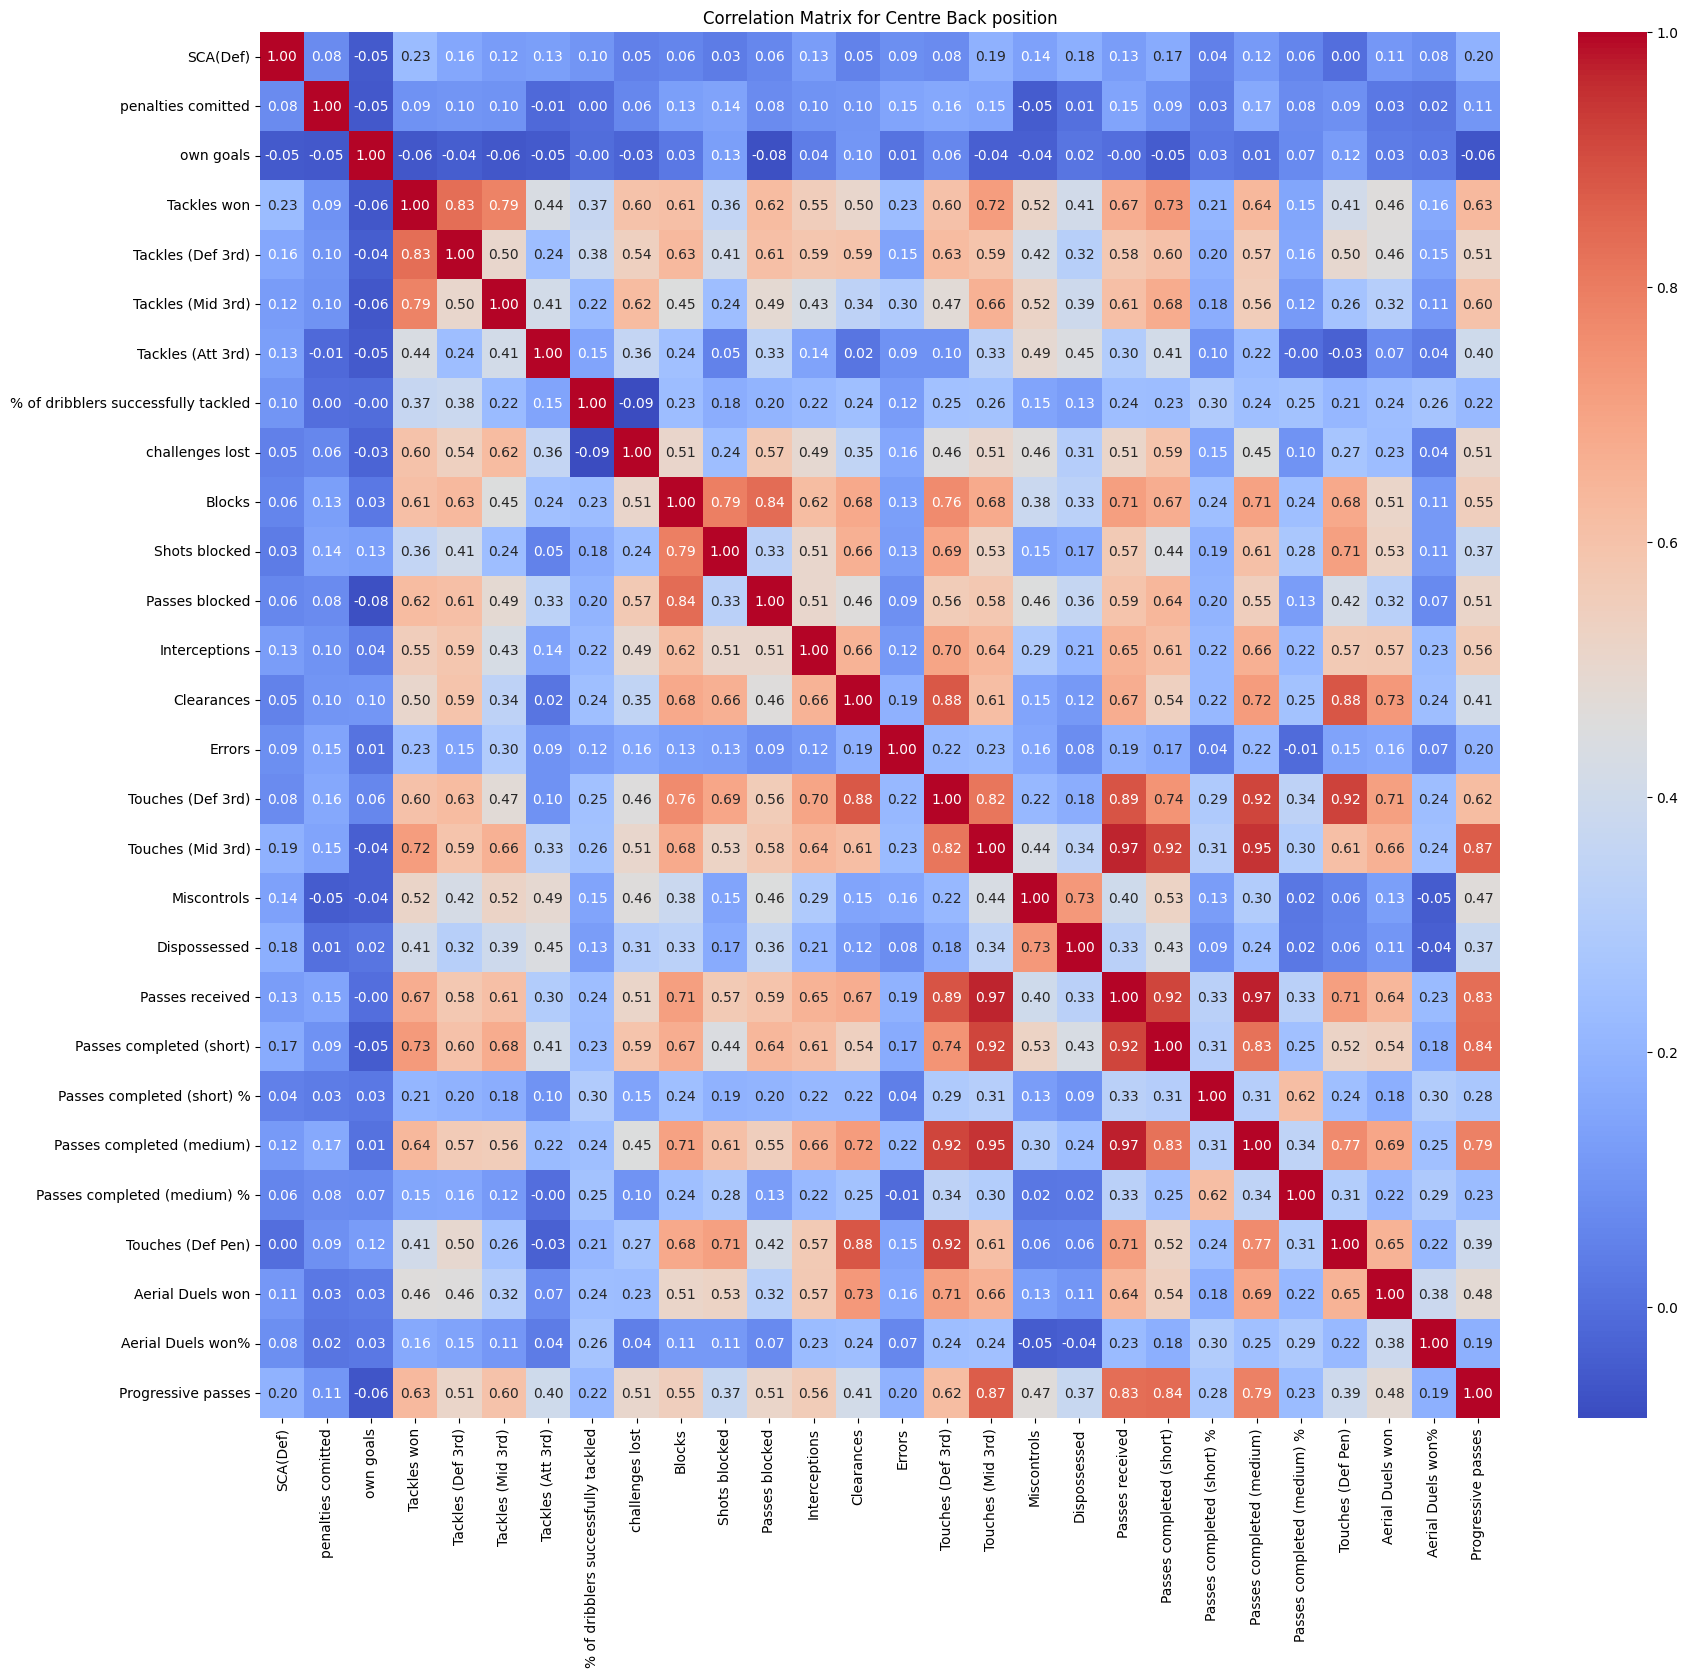

None

In [20]:
#visualization for correlation
def plot_correlation_matrix(data_cb):
    corr_matrix = df_cb.corr()
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix for Centre Back position')
    plt.show()

# Usage
display(plot_correlation_matrix(df_cb))

<ipython-input-21-c860d8f9884c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_fb.corr()


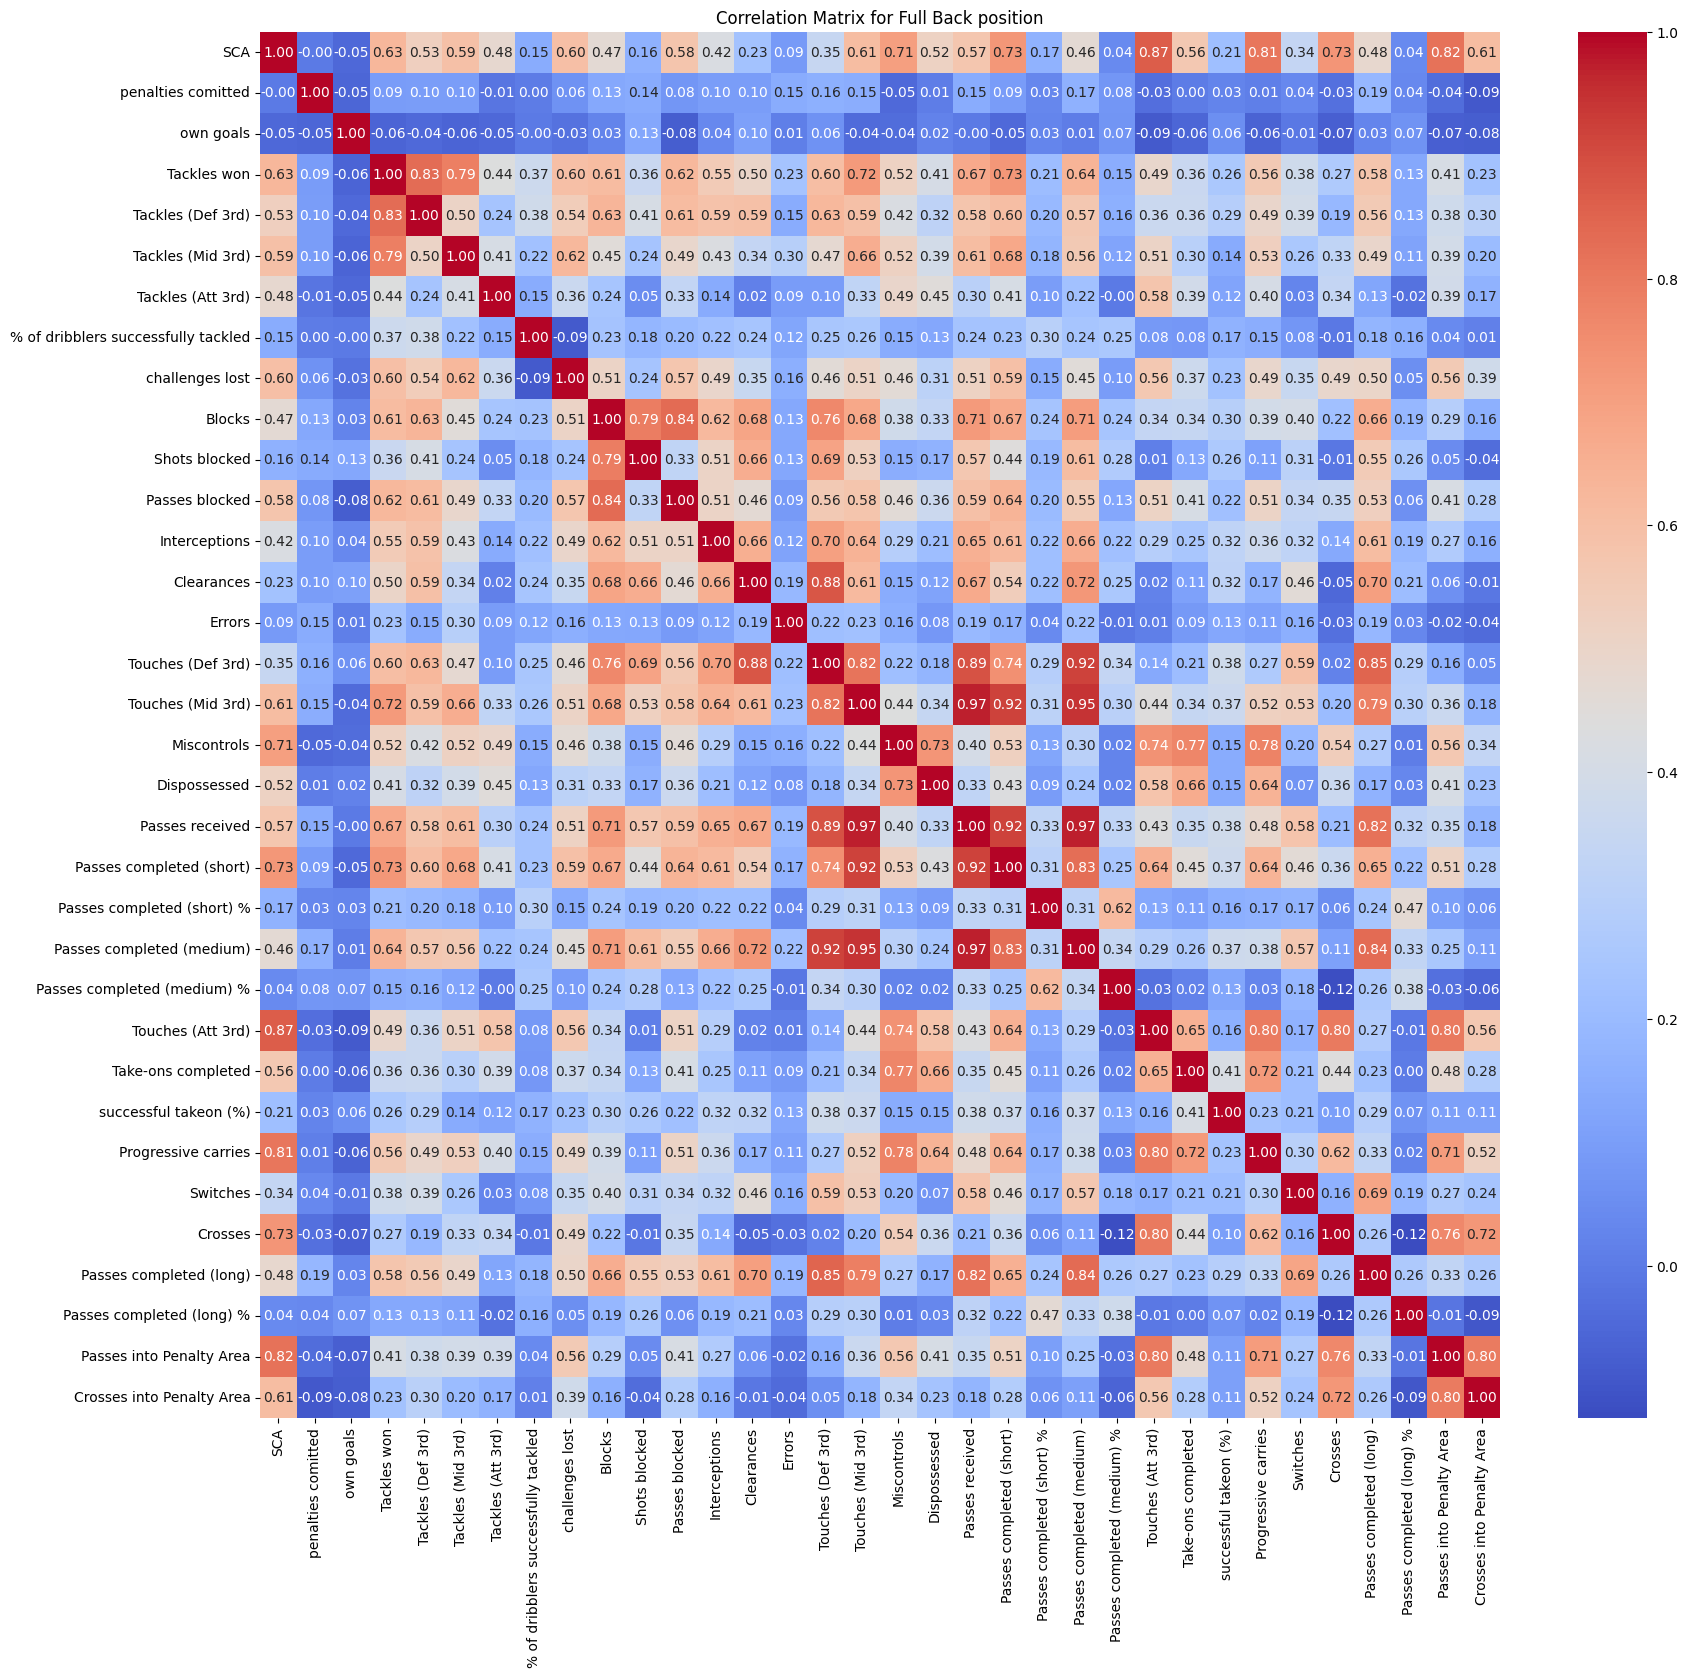

None

In [21]:
#visualization for correlation
def plot_correlation_matrix(data_fb):
    corr_matrix = df_fb.corr()
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix for Full Back position')
    plt.show()

# Usage
display(plot_correlation_matrix(df_fb))

In [22]:
# Define weights for each metric for CB position
metric_weights_cb = {
    'SCA(Def)': 12,
    'penalties comitted': -8,
    'own goals': -9,
    'Tackles won': 15,
    'Tackles (Def 3rd)': 12,
    'Tackles (Mid 3rd)': 14,
    'Tackles (Att 3rd)': 8,
    '% of dribblers successfully tackled': 10,
    'challenges lost': -7,
    'Blocks': 10,
    'Shots blocked': 12,
    'Passes blocked': 8,
    'Interceptions': 20,
    'Clearances': 12,
    'Errors': -8,
    'Touches (Def 3rd)': 11,
    'Touches (Mid 3rd)': 10,
    'Miscontrols': -7,
    'Dispossessed': -7,
    'Passes received': 8,
    'Passes completed (short)': 8,
    'Passes completed (short) %': 8,
    'Passes completed (medium)': 5,
    'Passes completed (medium) %': 5,
    'Touches (Def Pen)': 5,
    'Aerial Duels won': 10,
    'Aerial Duels won%': 10,
    'Progressive passes': 8
}

In [23]:
from sklearn.preprocessing import StandardScaler

# Define the metrics for analysis for CB position
metrics_for_analysis = df_cb.columns.difference(['Player', 'Position', 'Club'])

# Reset index to have a continuous index starting from 0
df_cb = df_cb.reset_index(drop=True)

# Method 1: StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cb[metrics_for_analysis])
df_cb_standardized = pd.DataFrame(scaled_data, columns=metrics_for_analysis)
df_cb_standardized[['Player', 'Position', 'Club']] = df_cb[['Player', 'Position', 'Club']]

# Method 2: Weighted Metrics (using the previously defined weights)
df_cb_weighted = df_cb.copy()

for metric in metrics_for_analysis:
    if metric in metric_weights_cb:
        df_cb_weighted[metric] = df_cb_weighted[metric] * metric_weights_cb[metric]

# Comparing the two DataFrames: df_cb_standardized and df_cb_weighted

# Print the first few rows of each DataFrame for comparison
print("Standard Scaler DataFrame:")
print(df_cb_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_cb_weighted.head())

Standard Scaler DataFrame:
   % of dribblers successfully tackled  Aerial Duels won  Aerial Duels won%  \
0                             0.151152          3.333815           0.136627   
1                             0.046744          0.760584          -0.241596   
2                             0.242904          1.446779           1.502433   
3                            -0.336084         -0.611807          -1.064582   
4                            -1.655417         -0.954904          -1.764995   

     Blocks  Clearances  Dispossessed    Errors  Interceptions  Miscontrols  \
0  0.786187    3.527309     -0.651611 -0.391857       1.519312     0.085912   
1  2.324527    0.861525     -0.167190  1.938660       1.029840     0.665496   
2 -0.752153    0.143814     -0.167190 -0.391857       0.540368    -0.493672   
3  1.811747    0.041284      0.317232 -0.391857       0.540368     0.955288   
4 -0.495763   -1.086547      0.317232 -0.391857      -1.172784    -0.783464   

   Passes blocked  ... 

In [24]:
# Method 1: StandardScaler
df_cb_standardized['total_score'] = df_cb_standardized[metrics_for_analysis].sum(axis=1)
top_5_cb_standardized = df_cb_standardized.sort_values(by='total_score', ascending=False).head(5)

# Method 2: Weighted Metrics
df_cb_weighted['total_score'] = df_cb_weighted[metrics_for_analysis].sum(axis=1)
top_5_cb_weighted = df_cb_weighted.sort_values(by='total_score', ascending=False).head(5)

# Print the top 5 defenders from each method
print("Top 5 CB (Standard Scaler):")
print(top_5_cb_standardized[['Player', 'Club', 'Position', 'total_score']])

print("\nTop 5 CB (Weighted Metrics):")
print(top_5_cb_weighted[['Player', 'Club', 'Position', 'total_score']])

Top 5 CB (Standard Scaler):
             Player             Club Position  total_score
58       Rúben Dias  Manchester City       DF    50.570207
1     Manuel Akanji  Manchester City       DF    47.496937
87   Theo Hernández            Milan       DF    44.910945
76    Álex Grimaldo          Benfica       DF    41.092431
138     Kim Min-jae           Napoli       DF    35.174724

Top 5 CB (Weighted Metrics):
                 Player             Club Position  total_score
58           Rúben Dias  Manchester City       DF      27587.9
1         Manuel Akanji  Manchester City       DF      22821.9
138         Kim Min-jae           Napoli       DF      19784.9
210     Dayot Upamecano    Bayern Munich       DF      18300.4
18   Alessandro Bastoni            Inter       DF      18084.0


In [25]:
# Define weights for each metric for FB position
fb_metric_weights = {
    'SCA': 12,
    'penalties comitted': -8,
    'own goals': -6,
    'Tackles won': 10,
    'Tackles (Def 3rd)': 10,
    'Tackles (Mid 3rd)': 15,
    'Tackles (Att 3rd)': 8,
    '% of dribblers successfully tackled': 10,
    'challenges lost': -5,
    'Blocks': 8,
    'Shots blocked': 5,
    'Passes blocked': 10,
    'Interceptions': 15,
    'Clearances': 12,
    'Errors': -7,
    'Touches (Def 3rd)': 3,
    'Touches (Mid 3rd)': 5,
    'Miscontrols': -5,
    'Dispossessed': -5,
    'Passes received': 8,
    'Passes completed (short)': 5,
    'Passes completed (short) %': 5,
    'Passes completed (medium)': 5,
    'Passes completed (medium) %': 5,
    'Touches (Att 3rd)': 12,
    'Take-ons completed': 15,
    'successful takeon (%)': 15,
    'Progressive carries': 8,
    'Switches': 6,
    'Crosses': 8,
    'Passes completed (long)': 8,
    'Passes completed (long) %': 8,
    'Passes into Penalty Area': 12,
    'Crosses into Penalty Area': 12
}

In [26]:
# Define the metrics for analysis
metricsfb_for_analysis = df_fb.columns.difference(['Player', 'Position', 'Club'])

# Reset index to have a continuous index starting from 0
df_fb = df_fb.reset_index(drop=True)

# Method 1: StandardScaler
scaler = StandardScaler()
scaled_data_fb = scaler.fit_transform(df_fb[fb_metrics])
df_fb_standardized = pd.DataFrame(scaled_data_fb, columns=fb_metrics)
df_fb_standardized[['Player', 'Position', 'Club']] = df_fb[['Player', 'Position', 'Club']]

# Method 2: Weighted Metrics (using the previously defined weights)
df_fb_weighted = df_fb.copy()

for metric in metricsfb_for_analysis:
    if metric in fb_metric_weights:
        df_fb_weighted[metric] = df_fb_weighted[metric] * fb_metric_weights[metric]

# Now you can compare the two DataFrames: df_fb_standardized and df_fb_weighted
# Continue with your analysis or comparison

# Example: Print the first few rows of each DataFrame for comparison
print("Standard Scaler DataFrame:")
print(df_fb_standardized.head())

print("\nWeighted Metrics DataFrame:")
print(df_fb_weighted.head())

Standard Scaler DataFrame:
        SCA  penalties comitted  own goals  Tackles won  Tackles (Def 3rd)  \
0  0.317442           -0.356506  -0.150414     1.024572           0.954388   
1  2.603334            2.421785  -0.150414     3.201336           1.475383   
2  0.317442           -0.356506  -0.150414     0.480381          -0.348098   
3  1.372469           -0.356506  -0.150414    -0.335905          -0.608595   
4  0.317442           -0.356506  -0.150414    -1.152192          -1.129590   

   Tackles (Mid 3rd)  Tackles (Att 3rd)  % of dribblers successfully tackled  \
0          -0.167047          -0.566967                             0.151152   
1           4.999111           1.623366                             0.046744   
2           1.422540           2.718533                             0.242904   
3           1.025143           0.528200                            -0.336084   
4          -0.961841          -0.566967                            -1.655417   

   challenges lost    B

In [27]:
# Method 1: StandardScaler
df_fb_standardized['total_score'] = df_fb_standardized[metricsfb_for_analysis].sum(axis=1)
top_5fb_standardized = df_fb_standardized.sort_values(by='total_score', ascending=False).head(5)

# Method 2: Weighted Metrics
df_fb_weighted['total_score'] = df_fb_weighted[metricsfb_for_analysis].sum(axis=1)
top_5fb_weighted = df_fb_weighted.sort_values(by='total_score', ascending=False).head(5)

# Display the top 5 fullbacks for each method
print("Top 5 Fullbacks - StandardScaler Method:")
print(top_5fb_standardized[['Player', 'Position', 'Club', 'total_score']])

print("\nTop 5 Fullbacks - Weighted Metrics Method:")
print(top_5fb_weighted[['Player', 'Position', 'Club', 'total_score']])




Top 5 Fullbacks - StandardScaler Method:
                Player Position             Club  total_score
76       Álex Grimaldo       DF          Benfica    63.252162
87      Theo Hernández       DF            Milan    55.520545
51     Alphonso Davies       DF    Bayern Munich    53.982384
1        Manuel Akanji       DF  Manchester City    53.500570
18  Alessandro Bastoni       DF            Inter    53.383277

Top 5 Fullbacks - Weighted Metrics Method:
                  Player Position             Club  total_score
58            Rúben Dias       DF  Manchester City      21913.8
1          Manuel Akanji       DF  Manchester City      18823.1
76         Álex Grimaldo       DF          Benfica      16980.0
57   Giovanni Di Lorenzo       DF           Napoli      15605.0
138          Kim Min-jae       DF           Napoli      15192.9


Based on the results above, we pick 2 CB position and 2 FB position.

Top 2 CB from UCL 2022/2023 Season is : Ruben Dias and Kim Min-Jae
Top 2 FB from UCL 2022/2023 Season is : Alex Grimaldo and Manuel Akanji